In [1]:
#combine interatomic potential with alignment rules

In [2]:
#total energy by adding all clusters for a long period

%matplotlib inline
#import keras
#from keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
import seaborn as sns; sns.set()
import math

from sklearn.mixture import GaussianMixture

data = pd.read_csv("Ob1.csv");
num=np.zeros((3, 5000))        
for st in range(0,5000):                     # time in 5s.
    rrData = data[data.t ==0.01*st+0.1] 
    if (len(rrData.index)>=84):
        rData = rrData[0:84]

        gm = GaussianMixture(n_components=12, random_state=0).fit(np.transpose([rData['x'].values,rData['y'].values,rData['z'].values]))
        gmfit = gm.predict(np.transpose([rData['x'].values,rData['y'].values,rData['z'].values]))

        total=0
        total2=0
        for c in range(0,12):                ##change total cluster number, n_components=number of flys in a frame/7
            j=0
            for i in range(0,len(gmfit)):                
                if (gmfit[i]==c):                 ##change cluster numbers (0,1,2,3) when 4 clusters in total
                    j+= 1                         #j is the cluster size, number of flys in one cluster
            sData = np.zeros((j, 11))        #sData shows the information of flys in one cluster.
            
            i=0
            k=0
            for i in range(0,len(gmfit)):
                if (gmfit[i]==c):                  ##change cluster numbers to c
                    sData[k,:] = rData.iloc[i,:]     
                    k+=1             
    
            Pot=0
            Kin=0
            n=0
            m=0
            for n in range(0, j):               # I realize for loop cannot reach the bondering of the range. the goal is (0,11) so the range should be (0,12)
                for m in range (n+1,j):
                    dmn=math.sqrt((sData[n,1]-sData[m,1])**2+(sData[n,2]-sData[m,2])**2+(sData[n,3]-sData[m,3])**2)
                    Pot+=((106/dmn)**(-12)-(106/dmn)**(-6))*(sData[n,5]*sData[m,5]+sData[n,6]*sData[m,6]+sData[n,7]*sData[m,7])
                Kin+=1.*(sData[n,5]**2+sData[n,6]**2+sData[n,7]**2)-1.*(sData[n,3]+300)
            total+=Kin+Pot
            
            Pot=0
            Kin=0
            n=0
            m=0
            for n in range(0, j):               # I realize for loop cannot reach the bondering of the range. the goal is (0,11) so the range should be (0,12)
                for m in range (n+1,j):
                    dmn=math.sqrt((sData[n,1]-sData[m,1])**2+(sData[n,2]-sData[m,2])**2+(sData[n,3]-sData[m,3])**2)
                    Pot+=((106/dmn)**(-12)-(106/dmn)**(-6))*(sData[n,5]*sData[m,5]+sData[n,6]*sData[m,6]+sData[n,7]*sData[m,7])
                Kin+=1000.*(sData[n,5]**2+sData[n,6]**2+sData[n,7]**2)-1000.*(sData[n,3]+300)
            total2+=Kin+Pot
            
        num[0,st]=0.01*st+0.1 # time
        num[1,st]=total       # D=J=1
        num[2,st]=total2      # D=J=1000
#plt.plot(num[0,:],num[1,:],'.')

In [3]:
#total energy by adding all flys for a long period
%matplotlib inline
#import keras
#from keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree
import seaborn as sns; sns.set()
import math

data = pd.read_csv("Ob1.csv");
num2=np.zeros((3, 5000))  
for st in range(0,5000):    
    rrData = data[data.t ==0.01*st+0.1] 
    if (len(rrData.index)>=84):
        rData = rrData[0:84]
        
        tree = KDTree(rData.iloc[:,1:4])
        nearest_dist, nearest_ind = tree.query(rData.iloc[:,1:4], k=7)  
    
        total=0
        total2=0
        for c in range(0,84):            # there are 84 flys at t=0.1s.   
            i=0
            j=0
            sData = np.zeros((7, 11))        #sData shows the information of flys in one cluster.
            for i in range(0,7):
                j=nearest_ind[c,i]
                sData[i,:] = rData.iloc[j,:]     
            Pot=0
            Kin=0
            n=0
            m=0
                         
            for m in range (1,7):
                dmn=math.sqrt((sData[0,1]-sData[m,1])**2+(sData[0,2]-sData[m,2])**2+(sData[0,3]-sData[m,3])**2)
                Pot+=((106/dmn)**(-12)-(106/dmn)**(-6))*(sData[0,5]*sData[m,5]+sData[0,6]*sData[m,6]+sData[0,7]*sData[m,7])
            Kin=1.*(sData[0,5]**2+sData[0,6]**2+sData[0,7]**2)-1.*(sData[0,3]+300)
            total+=Kin+Pot
            
            Pot=0
            Kin=0
            n=0
            m=0
            for m in range (1,7):
                dmn=math.sqrt((sData[0,1]-sData[m,1])**2+(sData[0,2]-sData[m,2])**2+(sData[0,3]-sData[m,3])**2)
                Pot+=((106/dmn)**(-12)-(106/dmn)**(-6))*(sData[0,5]*sData[m,5]+sData[0,6]*sData[m,6]+sData[0,7]*sData[m,7])
            Kin=1000.*(sData[0,5]**2+sData[0,6]**2+sData[0,7]**2)-1000.*(sData[0,3]+300)
            total2+=Kin+Pot
            
        num2[0,st]=0.01*st+0.1
        num2[1,st]=total
        num2[2,st]=total2
#plt.plot(num[0,:],num[1,:],'.')

/var/folders/0j/2j2rc_jx6px9jnx411hqwbxw0000gp/T/ipykernel_6239/1463981983.py:2: RuntimeWarning: invalid value encountered in true_divide
  y=abs((num2[1,:]-num[1,:])/num2[1,:])
/var/folders/0j/2j2rc_jx6px9jnx411hqwbxw0000gp/T/ipykernel_6239/1463981983.py:3: RuntimeWarning: invalid value encountered in true_divide
  y2=abs((num2[2,:]-num[2,:])/num2[2,:])


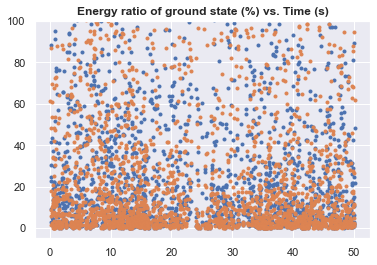

In [10]:
x=num[0,:]
y=abs((num2[1,:]-num[1,:])/num2[1,:])
y2=abs((num2[2,:]-num[2,:])/num2[2,:])
plt.plot(x,y,'.')
plt.plot(x,y2,'.')

#plt.ylabel("Energy ratio of ground state(%)")
#plt.xlabel("Time (s)")
plt.title('Energy ratio of ground state (%) vs. Time (s)', fontweight='bold')

plt.ylim([-5, 100])
plt.savefig('fig1c.eps', format='eps')
plt.show()


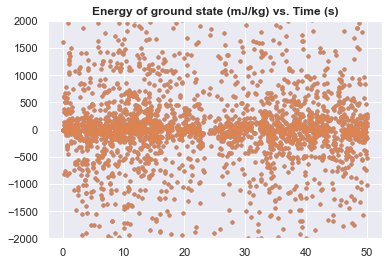

In [28]:
x=num[0,:]
y=(num2[1,:]-num[1,:])*10**(-9)
y2=(num2[2,:]-num[2,:])*10**(-9)
plt.plot(x,y,'.')
plt.plot(x,y2,'.')

#plt.ylabel("Energy of ground state (J/kg)")
#plt.xlabel("Time (s)")
#plt.title('Energy of ground state (\u03bcJ/kg) vs. Time (s)', fontweight='bold')
plt.title('Energy of ground state (mJ/kg) vs. Time (s)', fontweight='bold')
plt.ylim([-2000, 2000])
#plt.savefig('fig1b.eps', format='eps')
plt.show()


In [5]:
import statistics
statistics.mean((num2[1,:]-num[1,:])*10**(-9))

270.2719538790015

In [6]:
import statistics
statistics.mean((num2[2,:]-num[2,:])*10**(-9))

270.27195387900156

In [12]:
statistics.variance((num2[1,:]-num[1,:])*10**(-9))

801828093.1084421

In [13]:
statistics.variance((num2[2,:]-num[2,:])*10**(-9))

801828093.1084421

{'cauchy': {'loc': 0.07699649691616639, 'scale': 57.86292998794934}}

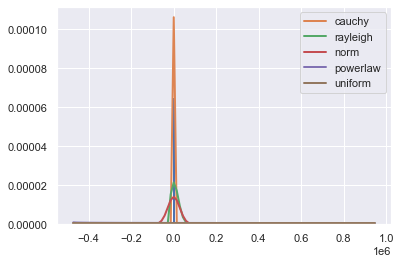

In [24]:
from fitter import Fitter, get_common_distributions, get_distributions
f=Fitter((num2[1,:]-num[1,:])*10**(-9), distributions=get_common_distributions())
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

{'cauchy': {'loc': 0.07699649691616639, 'scale': 57.862929987949286}}

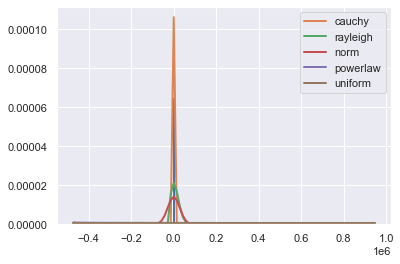

In [29]:
from fitter import Fitter, get_common_distributions, get_distributions
f=Fitter((num2[2,:]-num[2,:])*10**(-9), distributions=get_common_distributions())
f.fit()
f.summary()
f.get_best(method='sumsquare_error')